# Lab 5 - Spatial Analysis in Python, Part 2

## Lily Cao

### 1) Extend one coding example from the Geopandas Geoprocessing lab. Annotate, explain, and discuss.

First, I will load the necessary libraries:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Here, I will be extending the example on spatial joins from the geoprocessing lab. More specifically, I'm trying to find the intersections between the California truck route network and the following, which I think are relevant/have a relationship with the network:

1) Traffic bottlenecks

2) Rest areas

Before any calculations, I read in the shapefiles and GeoDataFrames. Instead of using the shapefile provided in the lab, I downloaded and used an updated shapefile from the Caltrans GIS Data website. In fact, all the shapefiles I used were from https://gisdata-caltrans.opendata.arcgis.com/.

In [69]:
truck_network = gpd.read_file('Truck_Network.shp')
truck_network.head()

,OBJECTID,RT,DT,CNY,BEG_PP,BEG_PM,EQ,END_PP,END_PM,SEGMENT_MI,...,KPRA,BEGIN_LOCA,END_LOCATI,COMMENT,Rte_Suf,Beg_Suf,End_Suf,Shape_Leng,Shape_Le_1,geometry
0,1,44,2,SHA,L,0.001,None,L,0.24,0.239,...,32,Market St. at Eureka Way in downtown Redding,Tehama St. at Pine St. in downtown Redding,This segment is also 273. Turn south on Marke...,None,R,R,0.003886,513.284099,"LINESTRING (-13624644.435 4951715.459, -136245..."
1,2,44,2,SHA,L,0.24,None,L,0.54,0.3,...,None,Tehama St. at Pine St. in downtown Redding,End independent alignment,None,None,R,R,0.005661,638.236729,"LINESTRING (-13624390.978 4951423.311, -136243..."
2,3,44,2,SHA,L,0.54,None,L,1.808,1.268,...,None,End independent alignment,Jct Rte 5,None,None,None,None,0.023987,2677.470582,"LINESTRING (-13623772.083 4951532.867, -136237..."
3,4,57,7,LA,R,11.284,None,R,12.303,1.019,...,None,Begin independent alignment right lanes to eas...,End independent alignment right lanes at EB 210.,None,None,None,R,0.016410,2005.346360,"LINESTRING (-13116102.756 4044014.105, -131161..."
4,5,80,3,PLA,None,0,E,R,58.712,58.629,...,None,Sacramento / Placer County Line,Placer / Nevada County Line,None,None,None,R,0.963432,121646.224450,"LINESTRING (-13502332.458 4681891.619, -135023..."


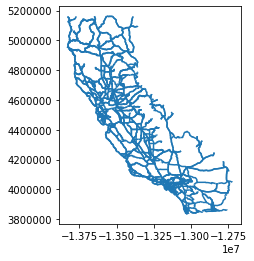

In [70]:
truck_network.plot()

I'm first finding the intersections with bottlenecks:

In [71]:
bottlenecks = gpd.read_file('Bottlenecks.shp')
bottlenecks.head()

,OBJECTID,CITY,COUNTY,ROUTE,BEG_CTY,BEG_CA_PM,END_CTY,END_CA_PM,DIR,LOCATION,...,TOTDURATN,VDS,BEG_AB_PM,END_AB_PM,BEG_LAT,BEG_LONG,END_LAT,END_LONG,SHAPE_Leng,geometry
0,1,Sacramento,Sacramento,50,SAC,L1.567,SAC,L1.100,E,16th Street,...,125.0,312139,4.7,4.3,38.562532,-121.489560,38.564656,-121.497518,931.589111,"LINESTRING (-13525043.269 4659503.482, -135245..."
1,2,Sacramento,Sacramento,99,SAC,19.8,SAC,17.713,N,WB Florin Road,...,302.0,312425,294.3,292.2,38.498256,-121.448118,38.474933,-121.423378,4307.368903,"LINESTRING (-13516790.131 4646737.543, -135168..."
2,3,Sacramento,Sacramento,99,SAC,23.42,SAC,22.573,N,8th Avenue POC,...,301.0,318566,297.9,297.0,38.545438,-121.473752,38.533350,-121.472015,1747.004589,"LINESTRING (-13522204.328 4655047.425, -135222..."
3,4,Sacramento,Sacramento,99,SAC,22.07,SAC,19.872,N,WB Fruitridge Road,...,52.0,312527,296.5,294.3,38.526685,-121.468411,38.499030,-121.448972,4528.107110,"LINESTRING (-13519639.212 4650164.532, -135197..."
4,5,Sacramento,Sacramento,5,SAC,18.705,SAC,17.543,N,43rd Avenue,...,62.0,314923,514.0,512.8,38.516737,-121.521874,38.500642,-121.517389,2394.880264,"LINESTRING (-13527255.354 4650393.815, -135272..."


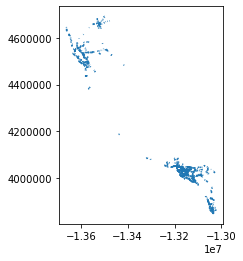

In [72]:
bottlenecks.plot()

Now that I've loaded both GeoDataFrames, I want to make sure they both have the same crs.

In [73]:
bottlenecks.crs

{'init': 'epsg:3857'}

In [74]:
bottlenecks.crs == truck_network.crs

True

Luckily, they do (epsg:3857) so I can correctly do an inner spatial join with sjoin.

In [75]:
network_bottlenecks = gpd.sjoin(truck_network, bottlenecks, how='inner', op='intersects')
network_bottlenecks.head()

,OBJECTID_left,RT,DT,CNY,BEG_PP,BEG_PM,EQ,END_PP,END_PM,SEGMENT_MI,...,NUMACTDAYS,TOTDURATN,VDS,BEG_AB_PM,END_AB_PM,BEG_LAT,BEG_LONG,END_LAT,END_LONG,SHAPE_Leng
3,4,57,7,LA,R,11.284,None,R,12.303,1.019,...,208,362.2,764089,23.197,21.890000,34.116260,-117.823987,34.096275,-117.819273,2834.656510
606,607,57,7,LA,R,0,None,R,11.284,11.284,...,208,362.2,764089,23.197,21.890000,34.116260,-117.823987,34.096275,-117.819273,2834.656510
3,4,57,7,LA,R,11.284,None,R,12.303,1.019,...,62,78.7,767896,47.789,44.622871,34.119372,-117.771695,34.120691,-117.826921,6151.000554
46,47,66,7,LA,None,0,E,None,3.22,3.216,...,62,78.7,767896,47.789,44.622871,34.119372,-117.771695,34.120691,-117.826921,6151.000554
3,4,57,7,LA,R,11.284,None,R,12.303,1.019,...,222,522.8,771603,45.949,43.996748,34.119720,-117.803812,34.119980,-117.837635,3790.500416


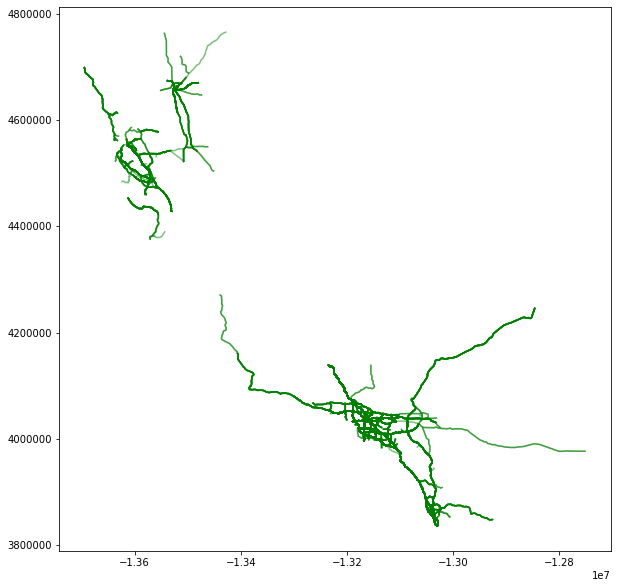

In [185]:
network_bottlenecks.plot(figsize=(10, 10), alpha=0.5, edgecolor='Green')

I want to know how many unique truck routes intersect with the bottlenecks, so I have to drop duplicates for multiple columns in network_bottlenecks that are associated with truck_network. I picked three: BEGIN_LOCA, END_LOCATI, and Shape_Leng.

In [112]:
unique_nb = network_bottlenecks.drop_duplicates(subset=['BEGIN_LOCA', 'END_LOCATI', 'Shape_Leng'])
print(len(unique_nb))
print(len(truck_network))

165
974


So 165 of the original 974 truck routes intersect with bottlenecks!

Next, I'm finding the intersections between the network and rest areas. I basically repeat the same process as above

In [78]:
rest_areas = gpd.read_file('Rest_Areas.shp')
rest_areas.head()

,OBJECTID,CT_NO,NAME,ADDRESS,CITY,ZIPCODE,POSTMILE_P,POSTMILE,POSTMILE_S,LATITUDE,...,TRAFFICDIR,RESTROOM,WATER,PICNICTAB,PHONE,HANDICAP,RV_STATION,VENDING,PET_AREA,geometry
0,1,90100018,Collier Tunnel Safety Roadside Rest Area - Nb ...,19 Mi N Of Gasquet And 3 Mi S Of Oregon State ...,Gasquet,95543,None,33.30,None,41.968489,...,N & S,Yes,Yes,Yes,Yes,Yes,No,No,Yes,POINT (-13775541.414 5156261.187)
1,2,90100029,Empire Camp Safety Roadside Rest Area - Nb,13.5 Miles North Of Laytonville.,Laytonville,95454,None,82.50,None,39.826746,...,N,Yes,Yes,Yes,Yes,Yes,No,No,Yes,POINT (-13758503.260 4840798.055)
2,3,90100054,Irvine Lodge Safety Roadside Rest Area - Nb,3 Miles North Of Sr 162 Jct.,Laytonville,95454,None,61.82,None,39.584265,...,N,Yes,Yes,Yes,Yes,Yes,No,No,Yes,POINT (-13741798.762 4805712.169)
3,4,90100071,Moss Cove Safety Roadside Rest Area - Sb,0.5 Miles South Of Sr 162 Jct.,Laytonville,95454,None,58.90,None,39.550350,...,S,Yes,Yes,Yes,Yes,Yes,No,No,Yes,POINT (-13739643.171 4800814.627)
4,5,90100085,Francis B. Mathews Safety Roadside Rest Area -...,2.5 Mi E Of Salyer And 7.5 Mi W Of Burnt Ranch.,Lewiston,96052,None,3.60,None,40.882761,...,E & W,Yes,Yes,Yes,No,Yes,Yes,No,Yes,POINT (-13753206.472 4995065.037)


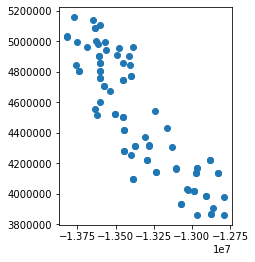

In [79]:
rest_areas.plot()

Unlike the bottlenecks, the rest areas have geometry type point.

In [80]:
rest_areas.crs == truck_network.crs

True

In [81]:
network_rest = gpd.sjoin(truck_network, rest_areas, how='inner', op='intersects')
len(network_rest)

0

It makes sense that there are no intersections. Truck routes are physically through highways while rest areas are off highways. Nevertheless, there might be a relationship between the two so instead, I'll calculate how many rest stops are within a 1609.34 meter buffer of the truck routes.

In [82]:
truck_network.crs

{'init': 'epsg:3857'}

In [83]:
buffered_truck = truck_network['geometry'].buffer(1609.34)
truck_network['buffer'] = buffered_truck
truck_network['buffer'].head()

0    POLYGON ((-13623309.971 4952613.234, -13623271...
1    POLYGON ((-13624902.637 4952948.192, -13624902...
2    POLYGON ((-13624259.517 4953064.754, -13624259...
3    POLYGON ((-13117640.678 4043540.569, -13117716...
4    POLYGON ((-13503520.514 4682977.238, -13503492...
Name: buffer, dtype: geometry

In [84]:
truck_network.geometry = truck_network['buffer']
truck_network.crs == rest_areas.crs

True

In [135]:
buff_network_rest = gpd.sjoin(rest_areas, truck_network, how='right', op='intersects')
buff_network_rest.head()

,index_left,OBJECTID_x,CT_NO,NAME,ADDRESS,CITY,ZIPCODE,POSTMILE_P,POSTMILE,POSTMILE_S,...,BEGIN_LOCA,END_LOCATI,COMMENT,Rte_Suf,Beg_Suf,End_Suf,Shape_Leng,Shape_Le_1,geometry,buffer
index_right,,,,,,,,,,,,,,,,,,,,,
196,0.0,1.0,90100018,Collier Tunnel Safety Roadside Rest Area - Nb ...,19 Mi N Of Gasquet And 3 Mi S Of Oregon State ...,Gasquet,95543,None,33.30,None,...,Jct Rte 101,Oregon State Line,None,None,L,None,0.624227,77848.580078,"POLYGON ((-13821038.671 5132914.970, -13820912...","POLYGON ((-13821038.671 5132914.970, -13820912..."
669,1.0,2.0,90100029,Empire Camp Safety Roadside Rest Area - Nb,13.5 Miles North Of Laytonville.,Laytonville,95454,None,82.50,None,...,Sonoma / Mendocino County Line,Jct Rte 1,None,None,None,None,2.900977,380545.889030,"POLYGON ((-13773483.787 4845674.042, -13773483...","POLYGON ((-13773483.787 4845674.042, -13773483..."
669,2.0,3.0,90100054,Irvine Lodge Safety Roadside Rest Area - Nb,3 Miles North Of Sr 162 Jct.,Laytonville,95454,None,61.82,None,...,Sonoma / Mendocino County Line,Jct Rte 1,None,None,None,None,2.900977,380545.889030,"POLYGON ((-13773483.787 4845674.042, -13773483...","POLYGON ((-13773483.787 4845674.042, -13773483..."
669,3.0,4.0,90100071,Moss Cove Safety Roadside Rest Area - Sb,0.5 Miles South Of Sr 162 Jct.,Laytonville,95454,None,58.90,None,...,Sonoma / Mendocino County Line,Jct Rte 1,None,None,None,None,2.900977,380545.889030,"POLYGON ((-13773483.787 4845674.042, -13773483...","POLYGON ((-13773483.787 4845674.042, -13773483..."
844,3.0,4.0,90100071,Moss Cove Safety Roadside Rest Area - Sb,0.5 Miles South Of Sr 162 Jct.,Laytonville,95454,None,58.90,None,...,Jct Rte 101,"""End 162"" sign at Short Creek, 1.1 miles east ...",None,None,None,None,1.114931,142563.597794,"POLYGON ((-13741802.627 4801437.548, -13741802...","POLYGON ((-13741802.627 4801437.548, -13741802..."


I ultimately want to know how many rest areas each unique truck route has within its 1 mile buffer. To get the count, I have to group the rest area addresses by each of the 974 truck routes, which I mark by giving each a unique index.

In [152]:
buff_network_rest['truck_indeces'] = buff_network_rest.index

In [153]:
rest_per_route = buff_network_rest.groupby(['truck_indeces'])['ADDRESS'].count()

To make it easier to read and use, I converted the series to a Pandas dataframe.

In [154]:
rest_per_route = rest_per_route.to_frame()
rest_per_route.head()

,ADDRESS
truck_indeces,
0,0
1,0
2,0
3,0
4,2


A lot of truck routes don't have rest areas in their buffers. By sorting the counts, I can figure out which truck routes have the highest number of rest areas.

In [162]:
rest_per_route.sort_values('ADDRESS', ascending=False).head()

,ADDRESS
truck_indeces,
375,6
340,4
390,4
350,4
342,4


I want to plot these 5 truck routes. However, truck_network's geometry is now the buffer (polygon) while I want the original linestring. So, I read in the original shapefile again and create a column of ideces so I can merge it with rest_per_route. 

In [173]:
truck_network2 = gpd.read_file('Truck_Network.shp')
truck_network2['truck_indeces'] = truck_network2.index

In [174]:
truck_network2 = truck_network2.merge(rest_per_route, on = 'truck_indeces')
truck_network2.head()

,OBJECTID,RT,DT,CNY,BEG_PP,BEG_PM,EQ,END_PP,END_PM,SEGMENT_MI,...,END_LOCATI,COMMENT,Rte_Suf,Beg_Suf,End_Suf,Shape_Leng,Shape_Le_1,geometry,truck_indeces,ADDRESS
0,1,44,2,SHA,L,0.001,None,L,0.24,0.239,...,Tehama St. at Pine St. in downtown Redding,This segment is also 273. Turn south on Marke...,None,R,R,0.003886,513.284099,"LINESTRING (-13624644.435 4951715.459, -136245...",0,0
1,2,44,2,SHA,L,0.24,None,L,0.54,0.3,...,End independent alignment,None,None,R,R,0.005661,638.236729,"LINESTRING (-13624390.978 4951423.311, -136243...",1,0
2,3,44,2,SHA,L,0.54,None,L,1.808,1.268,...,Jct Rte 5,None,None,None,None,0.023987,2677.470582,"LINESTRING (-13623772.083 4951532.867, -136237...",2,0
3,4,57,7,LA,R,11.284,None,R,12.303,1.019,...,End independent alignment right lanes at EB 210.,None,None,None,R,0.016410,2005.346360,"LINESTRING (-13116102.756 4044014.105, -131161...",3,0
4,5,80,3,PLA,None,0,E,R,58.712,58.629,...,Placer / Nevada County Line,None,None,None,R,0.963432,121646.224450,"LINESTRING (-13502332.458 4681891.619, -135023...",4,2


In [178]:
top_5_routes = [375, 340, 390, 350, 342]
top_5 = truck_network2.loc[truck_network2['truck_indeces'].isin(top_5_routes)]
top_5

,OBJECTID,RT,DT,CNY,BEG_PP,BEG_PM,EQ,END_PP,END_PM,SEGMENT_MI,...,END_LOCATI,COMMENT,Rte_Suf,Beg_Suf,End_Suf,Shape_Leng,Shape_Le_1,geometry,truck_indeces,ADDRESS
340,341,5,6,KER,R,0,E,None,87.025,86.989,...,Kern / Kings County Line,None,None,None,None,2.757200,343734.742374,"MULTILINESTRING ((-13233872.889 4139153.203, -...",340,4
342,343,5,6,FRE,None,0,None,None,66.159,66.159,...,Fresno / Merced County Line,None,None,None,None,2.082415,265267.948776,"MULTILINESTRING ((-13369349.012 4310905.220, -...",342,4
350,351,5,2,TEH,R,0,E,None,42.115,40.623,...,Tehama / Shasta County Line,None,None,None,None,1.191543,171340.275536,"MULTILINESTRING ((-13603355.603 4836648.427, -...",350,4
375,376,10,8,RIV,R,0,E,R,156.492,155.674,...,Arizona State Line,None,None,None,None,5.313458,602260.954072,"MULTILINESTRING ((-13031602.188 4029330.436, -...",375,6
390,391,15,8,SBD,None,0,E,None,186.238,187.008,...,Nevada State Line,None,None,None,None,6.098237,734772.637135,"MULTILINESTRING ((-13085657.042 4033298.277, -...",390,4


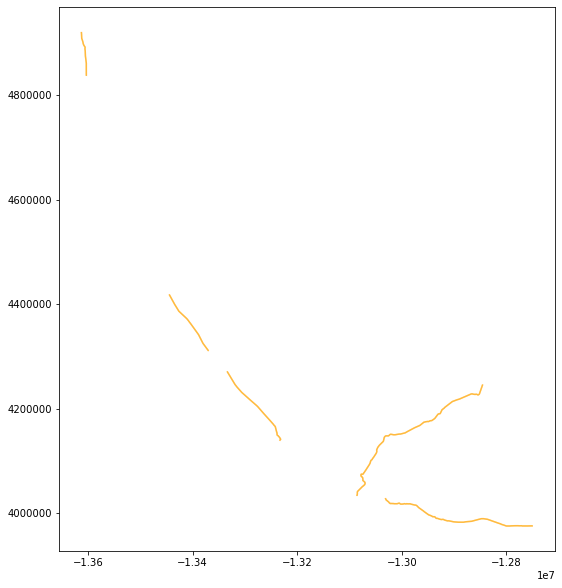

In [184]:
top_5.plot(figsize=(10, 10), alpha=0.5, edgecolor='Orange')

## 2) Extend one coding example from the Geovisualization lab. Annotate, explain, and discuss.

Now, I'm going to extend the example from the geovisualization lab on creating value-by-alpha maps. I'm going to be creating a map of California using CalEnviroScreen scores as my first variable. CalEnviroScreen uses environmental, health, and socioeconomic information to produce socres for every census tract in California. An area with a high score is one that experiences a higher pollution burden than areas with lower socres. As for my second variable, I'll be using the following, all of which are columns from the CalEnviroScreen shapefile:

1) Population
2) Ozone
3) PM2.5
4) Diesel
5) Drinking Water
6) Pesticides
7) Toxins
8) Traffic
9) Hazardous Waste
10) Pollution
11) Asthma
12) Cardiovascular
13) Education
14) Poverty
15) Unemployment
16) Children
17) Elderly
18) Minority (Hispanic, African American)
19) White

I got the data for pollution scores from https://data.ca.gov/dataset/calenviroscreen-3-0-results.

In [2]:
from pysal.viz.splot.mapping import vba_choropleth

/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
pollution = gpd.read_file('CES3Results.shp')
pollution.head()

,Tract_1,Percentile,Population,County,ZIP,City,CIscore,CIscoreP,Ozone,Ozone_Pctl,...,Elderly___,Hispanic__,White____,African_Am,Native_Ame,Asian_Amer,Other____,Shape_Leng,Shape_Area,geometry
0,6.083002e+09,56-60%,3930,Santa Barbara,93454,Santa Maria,29.51,59,0.035,17,...,13.1,57.5,31.3,1.9,0.5,7.2,1.6,6999.357622,2.847611e+06,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,66-70%,11406,Santa Barbara,93455,Santa Maria,33.17,65,0.035,17,...,6.2,74,17.4,1.4,0.2,5.5,1.6,19100.578003,1.635292e+07,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,41-45%,2084,Santa Barbara,93454,Santa Maria,22.85,45,0.035,17,...,13.2,52.2,40.9,0.8,0.5,2.9,2.6,4970.985933,1.352330e+06,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,1-5% (lowest scores),4375,Santa Barbara,93455,Santa Maria,4.45,2,0.035,17,...,14.4,20,71.9,1,0.6,4,2.6,6558.956142,2.417717e+06,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,1-5% (lowest scores),3826,Santa Barbara,93455,Santa Maria,5.28,3,0.035,17,...,15.9,25.7,65.4,1.5,0.8,3.5,3.2,6570.368642,2.608422e+06,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


The CIscore will always be the first (x) variable

In [9]:
x = pollution['CIscore'].values

I create a y_i for each of my 20 second variables. For the 'African_Am' and 'Hispanic' columns, I have to convert the values from strings to numeric so that I can add them together (see y18). I do the same for 'White' because vba_choropleth gives an error when using floats.

In [11]:
pollution['African_Am'] = pd.to_numeric(pollution['African_Am'],errors='coerce')
pollution["Hispanic__"] = pd.to_numeric(pollution['Hispanic__'],errors='coerce')
pollution["White____"] = pd.to_numeric(pollution['White____'],errors='coerce')

In [10]:
y1 = pollution['Population'].values
y2 = pollution['Ozone'].values
y3 = pollution['PM2_5'].values
y4 = pollution['Diesel_PM'].values
y5 = pollution['DrinkingWa'].values
y6 = pollution['Pesticides'].values
y7 = pollution['Tox_Releas'].values
y8 = pollution['Traffic'].values
y9 = pollution['Haz_Waste'].values
y10 = pollution['PollutionS'].values
y11 = pollution['Asthma'].values
y12 = pollution['Cardiovasc'].values
y13 = pollution['Education'].values
y14 = pollution['Poverty'].values
y15 = pollution['Unemployme'].values
y16 = pollution['Children__'].values
y17 = pollution['Elderly___'].values
y18 = pollution['Hispanic__'].values + pollution['African_Am'].values
y19 = pollution['White____'].values

Now I can create my value-by-alpha maps based on instructions from the lab. I'll create separate plots based on variable cateogories (i.e. demographics)

#### Demographics

y1(Population), y14(Poverty), y15(Unemployment), y16(Children), y17(Elderly), y18(Hispanic + African American), y19(White)

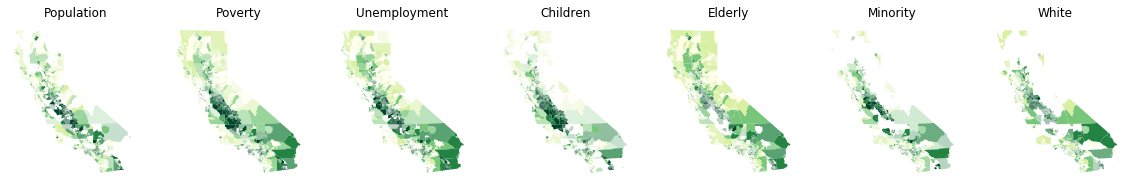

In [277]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize=(20,10))

vba_choropleth(x, y1, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[0])
axs[0].set_title('Population')

vba_choropleth(x, y14, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[1])
axs[1].set_title('Poverty')

vba_choropleth(x, y15, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[2])
axs[2].set_title('Unemployment')

vba_choropleth(x, y16, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[3])
axs[3].set_title('Children')

vba_choropleth(x, y17, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[4])
axs[4].set_title('Elderly')

vba_choropleth(x, y18, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[5])
axs[5].set_title('Minority')


vba_choropleth(x, y19, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[6])
axs[6].set_title('White')


plt.show()

#### Environment

y2(Ozone), y3(PM 2.5), y10(Pollution)

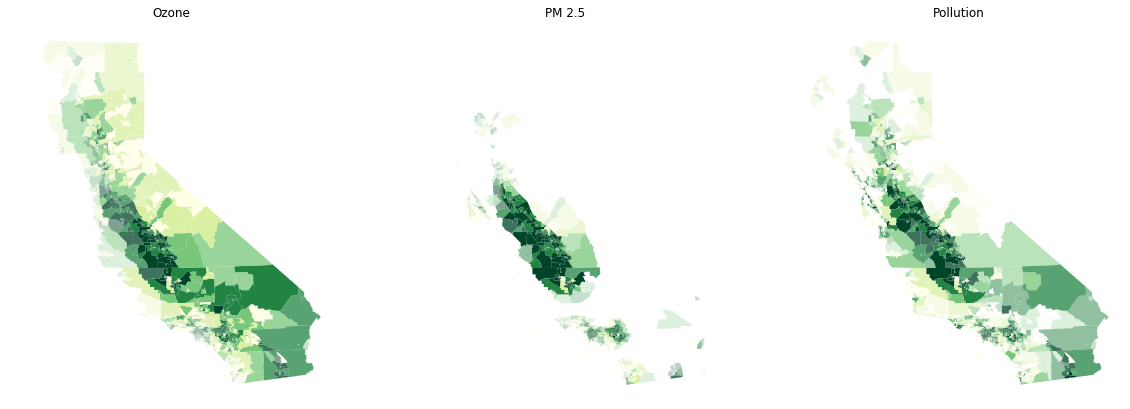

In [272]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(20,10))

vba_choropleth(x, y2, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[0])
axs[0].set_title('Ozone')

vba_choropleth(x, y3, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[1])
axs[1].set_title('PM 2.5')

vba_choropleth(x, y10, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[2])
axs[2].set_title('Pollution')


plt.show()

#### Also environment

y4(Diesel), y5(Drinking Water), y6(Pesticides), y7(Toxic Releases), y9(Hazardous Waste)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


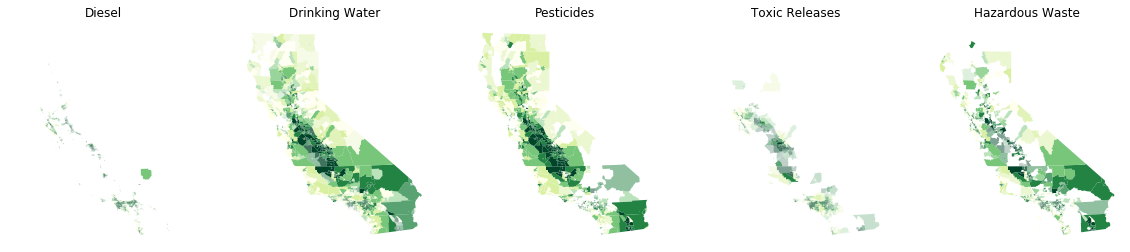

In [262]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize=(20,10))

vba_choropleth(x, y4, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[0])
axs[0].set_title('Diesel')

vba_choropleth(x, y5, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[1])
axs[1].set_title('Drinking Water')

vba_choropleth(x, y6, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[2])
axs[2].set_title('Pesticides')

vba_choropleth(x, y7, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[3])
axs[3].set_title('Toxic Releases')

vba_choropleth(x, y9, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[4])
axs[4].set_title('Hazardous Waste')

plt.show()

#### Health

y11(Asthma), y12(Cardiovascular)

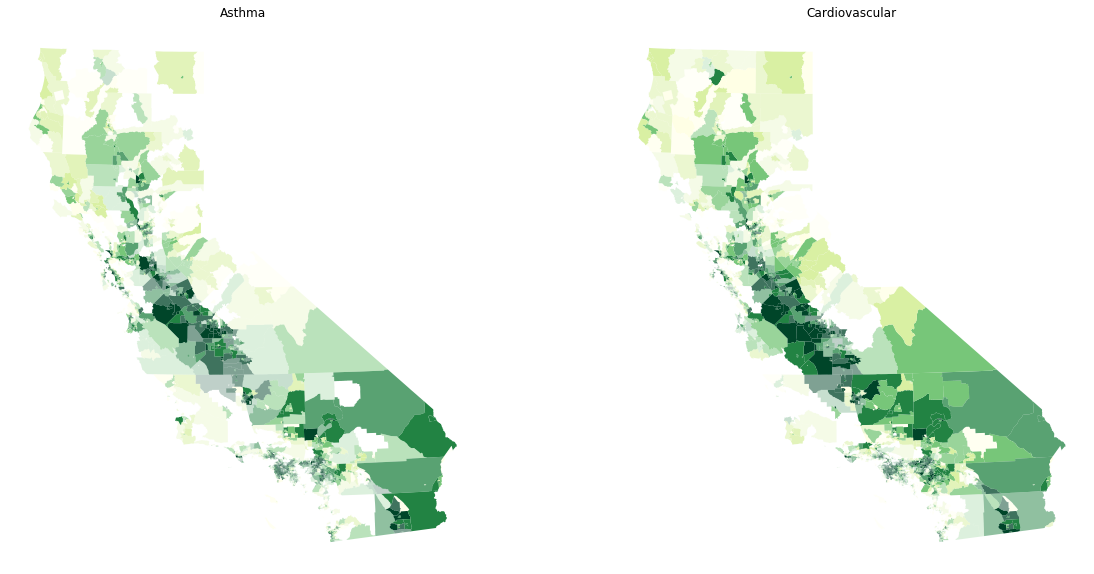

In [273]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))

vba_choropleth(x, y11, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[0])
axs[0].set_title('Asthma')

vba_choropleth(x, y12, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[1])
axs[1].set_title('Cardiovascular')


plt.show()

#### Other

y9(Traffic), y13(Education)

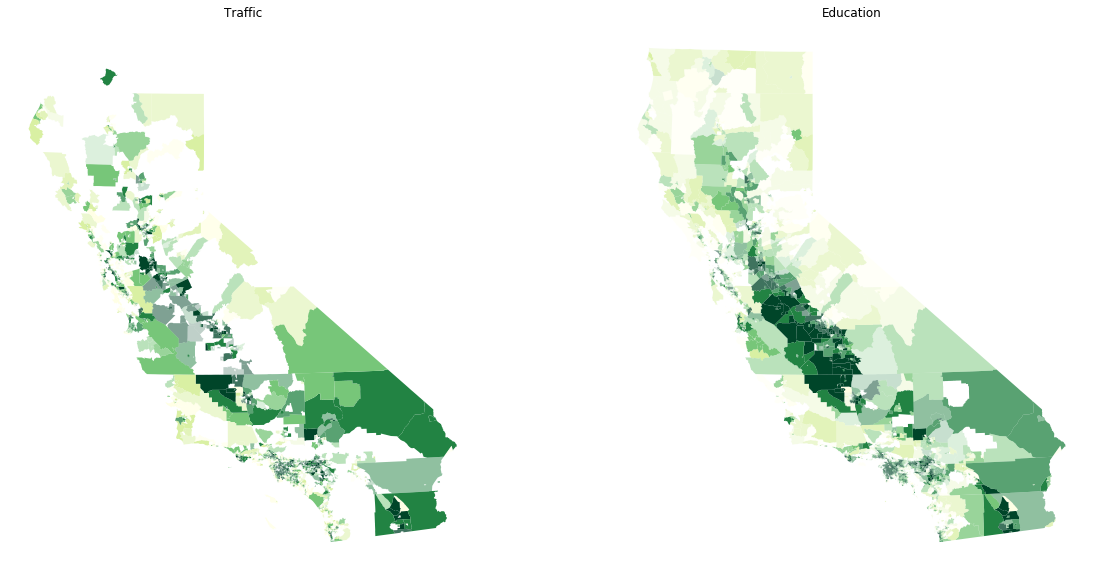

In [274]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))

vba_choropleth(x, y9, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[0])
axs[0].set_title('Traffic')

vba_choropleth(x, y13, pollution, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='YlGn', ax=axs[1])
axs[1].set_title('Education')


plt.show()

So for all these value-by-alpha maps, the more green an area is, the higher the CI score, and the more transparent an area is, the higher the y value.

By comparing a normal choropleth map with all of these plots, it seems that areas with higher CIscores also have particularly high scores (more transparent) in elderly, white, diesel, toxic releases, hazardous waste, and traffic.

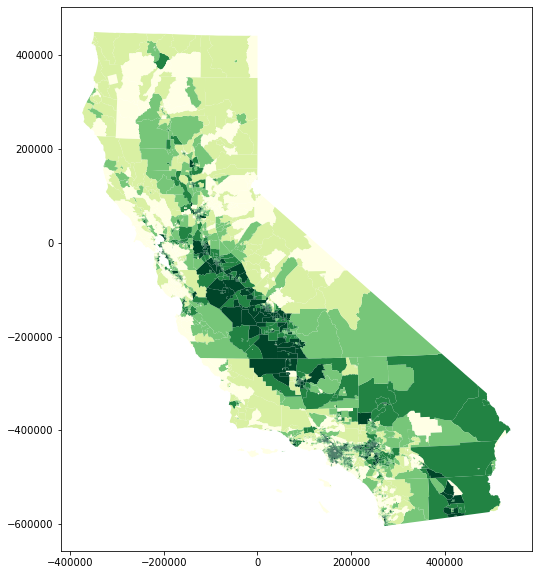

In [276]:
pollution.plot(column='CIscore', scheme='quantiles', cmap='YlGn', figsize=(10, 10))

I'm also interested in the relationship between fire hazard severity zones and PM 2.5 levels. PM 2.5 is an air pollutant that not only reduce air visibility but also negatively impacts people's health. I theorize that areas with high PM 2.5 scores have high fire hazard severities.

First, I need to read in the fire hazard severity data, which I got from https://osfm.fire.ca.gov/divisions/wildfire-planning-engineering/wildland-hazards-building-codes/fire-hazard-severity-zones-maps/.

In [4]:
fire_hazard = gpd.read_file('fhszs06_3.shp')
fire_hazard.head()

,SRA,HAZ_CODE,HAZ_CLASS,Shape_Leng,Shape_Area,geometry
0,SRA,1,Moderate,2008.682925,1.088987e+05,"POLYGON ((289200.001 -601380.000, 289200.001 -..."
1,SRA,1,Moderate,2759.997400,1.484999e+05,"POLYGON ((288270.000 -598230.000, 288270.000 -..."
2,SRA,1,Moderate,2507.495791,1.492179e+05,"POLYGON ((281609.999 -596129.999, 281609.999 -..."
3,SRA,1,Moderate,4252.980415,1.577006e+05,"POLYGON ((340410.000 -594690.000, 340410.000 -..."
4,SRA,1,Moderate,9090.995905,1.084232e+06,"POLYGON ((318179.999 -593400.000, 318259.865 -..."


In [6]:
fire_hazard['HAZ_CLASS'].unique()

array(['Moderate', 'High', 'Very High'], dtype=object)

Since my y variable can't be a string, I assign each level an integer number:

Moderate = 1, High = 2, Very High = 3

In [5]:
levels = {'Moderate': 1, 'High': 2, 'Very High': 3}
fire_hazard['HAZ_Level'] = fire_hazard['HAZ_CLASS'].map(levels)
fire_hazard.head()

,SRA,HAZ_CODE,HAZ_CLASS,Shape_Leng,Shape_Area,geometry,HAZ_Level
0,SRA,1,Moderate,2008.682925,1.088987e+05,"POLYGON ((289200.001 -601380.000, 289200.001 -...",1
1,SRA,1,Moderate,2759.997400,1.484999e+05,"POLYGON ((288270.000 -598230.000, 288270.000 -...",1
2,SRA,1,Moderate,2507.495791,1.492179e+05,"POLYGON ((281609.999 -596129.999, 281609.999 -...",1
3,SRA,1,Moderate,4252.980415,1.577006e+05,"POLYGON ((340410.000 -594690.000, 340410.000 -...",1
4,SRA,1,Moderate,9090.995905,1.084232e+06,"POLYGON ((318179.999 -593400.000, 318259.865 -...",1


Now another issue is that fire_hazard and pollution have different shapes, and I can't make a value-by-alpha graph with different shapes.

In [22]:
fire_hazard.shape

(17267, 7)

In [26]:
pollution.shape

(8035, 64)

Instead, I can find the intersections between the two dataframes using a spatial join and have one dataframe of one shape.

In [6]:
fire_hazard.crs = pollution.crs

In [7]:
fire_poll = gpd.sjoin(fire_hazard, pollution, how='inner', op='intersects')
fire_poll.head()

,SRA,HAZ_CODE,HAZ_CLASS,Shape_Leng_left,Shape_Area_left,geometry,HAZ_Level,index_right,Tract_1,Percentile,...,Pop_11_64_,Elderly___,Hispanic__,White____,African_Am,Native_Ame,Asian_Amer,Other____,Shape_Leng_right,Shape_Area_right
0,SRA,1,Moderate,2.008683e+03,1.088987e+05,"POLYGON ((289200.001 -601380.000, 289200.001 -...",1,2674,6.073010e+09,56-60%,...,76.7,6.1,82.9,4.9,2.4,0.2,7.9,1.7,42940.850955,4.041962e+07
4756,SRA,2,High,3.753464e+04,1.293493e+07,"POLYGON ((287970.001 -597088.536, 287970.000 -...",2,2674,6.073010e+09,56-60%,...,76.7,6.1,82.9,4.9,2.4,0.2,7.9,1.7,42940.850955,4.041962e+07
9699,SRA,3,Very High,6.084886e+06,3.624392e+09,"POLYGON ((291308.930 -476127.253, 291298.284 -...",3,2674,6.073010e+09,56-60%,...,76.7,6.1,82.9,4.9,2.4,0.2,7.9,1.7,42940.850955,4.041962e+07
1,SRA,1,Moderate,2.759997e+03,1.484999e+05,"POLYGON ((288270.000 -598230.000, 288270.000 -...",1,2417,6.073010e+09,56-60%,...,82.9,3.7,50.6,16.4,11.9,0.3,17.5,3.3,29015.302066,2.846959e+07
4756,SRA,2,High,3.753464e+04,1.293493e+07,"POLYGON ((287970.001 -597088.536, 287970.000 -...",2,2417,6.073010e+09,56-60%,...,82.9,3.7,50.6,16.4,11.9,0.3,17.5,3.3,29015.302066,2.846959e+07


Now I can assign my x and y variables and create my maps

In [8]:
x = fire_poll['HAZ_Level'].values
y = fire_poll['PM2_5'].values

/srv/conda/envs/notebook/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


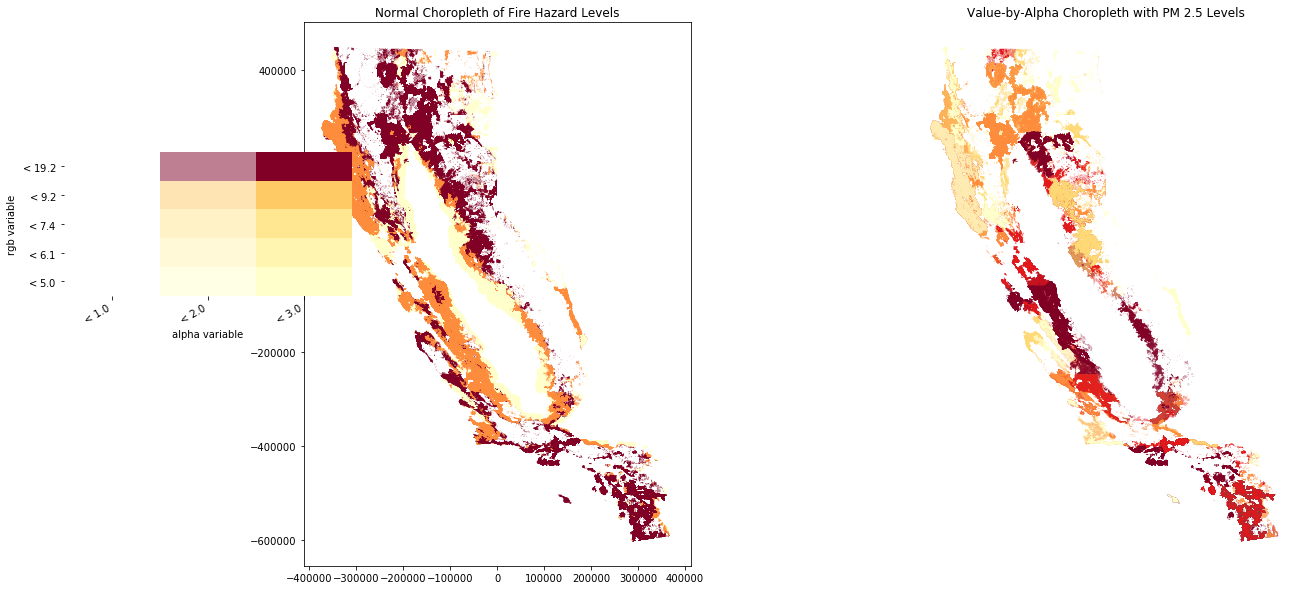

In [45]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

fire_poll.plot(column='HAZ_Level', scheme='quantiles', cmap='YlOrRd', ax=axs[0])

vba_choropleth(x, y, fire_poll, rgb_mapclassify=dict(classifier='quantiles', k=5),
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, cmap='YlOrRd', ax=axs[1])

axs[0].set_title('Normal Choropleth of Fire Hazard Levels')
axs[1].set_title('Value-by-Alpha Choropleth with PM 2.5 Levels')

plt.show()

The the more red an area is, the higher its fire hazard level; the more yellow, the lower. By comparing the normal choropleth map and the vba one, we see that areas with high fire hazard levels have high PM 2.5 levels, as those same areas are more transparent in the vba map. 

*Note*: Since I did a spatial join where I kept all the geometries (polygons) from the fire hazard dataframe but only the geometries from the pollution dataframe that intersected, we notice many areas from pollution dataframe map are missing here.

/srv/conda/envs/notebook/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


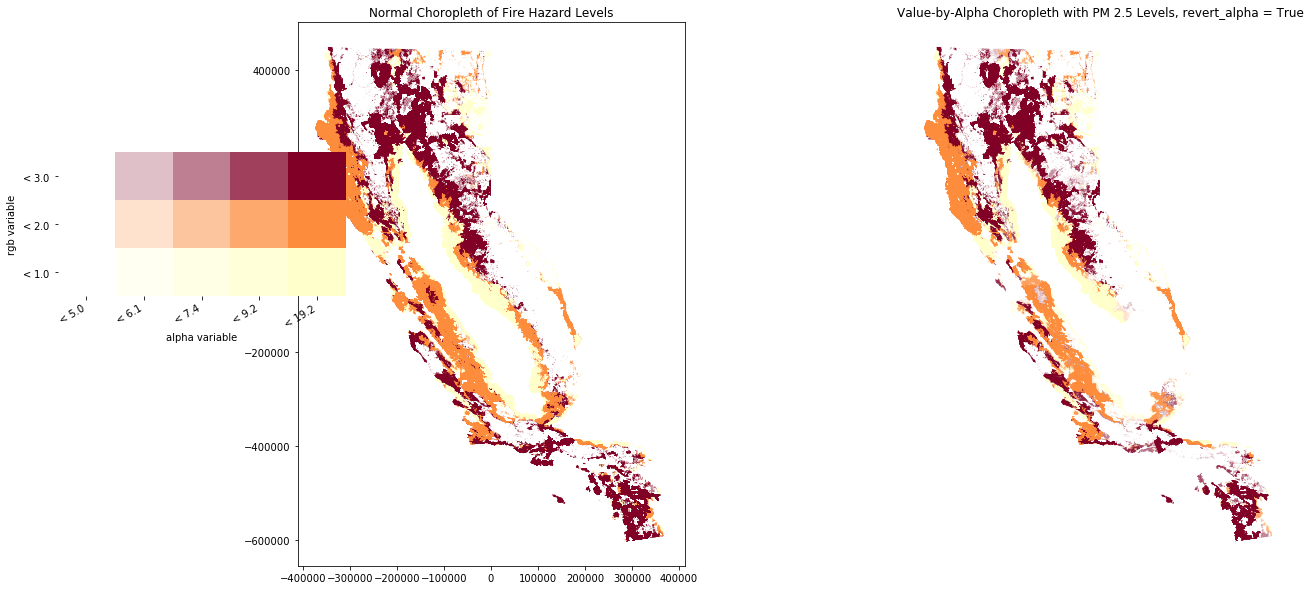

In [14]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

fire_poll.plot(column='HAZ_Level', scheme='quantiles', cmap='YlOrRd', ax=axs[0])

vba_choropleth(x, y, fire_poll, rgb_mapclassify=dict(classifier='quantiles', k=5),
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, revert_alpha=True, cmap='YlOrRd', ax=axs[1])

axs[0].set_title('Normal Choropleth of Fire Hazard Levels')
axs[1].set_title('Value-by-Alpha Choropleth with PM 2.5 Levels, revert_alpha = True')

plt.show()

Similarly, when I set revert_alpha = True so that areas with low PM 2.5 levels are transparent and those with high PM 2.5 levels pop, we end up with the same conclusion. This vba map looks almost identical to the normal choropleth map, telling us that high fire hazard severity is associated with high PM 2.5 levels.